In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

🔹 Ejercicio Frecuencia de números en matriz

Genera una matriz 6x6 de enteros aleatorios entre 1 y 10 usando NumPy.

Recorre la matriz y guarda en un diccionario la frecuencia de cada número.

Convierte el diccionario en una lista de tuplas (número, frecuencia) y ordénala de mayor a menor frecuencia.

Imprime la matriz, el diccionario y la lista ordenada.

In [2]:
v0, v1, size = 1, 10, [6, 6]
matrix = np.random.randint(v0, v1+1, size=size)

diccionario, lista = {}, []
for val in range(v0, v1+1):
    diccionario[val] = int( sum(sum(matrix==val)) )
    lista.append( (val, diccionario[val]) )
    
lista.sort(key=lambda x: x[1], reverse=True)

print(matrix, diccionario, lista)

[[ 3  4  7  4  2 10]
 [ 6 10  3  8  9  1]
 [10  3  7  5  4  5]
 [ 2  2  8  8  3  7]
 [ 4  8  8  1  4  4]
 [ 7  1  8 10  7  6]] {1: 3, 2: 3, 3: 4, 4: 6, 5: 2, 6: 2, 7: 5, 8: 6, 9: 1, 10: 4} [(4, 6), (8, 6), (7, 5), (3, 4), (10, 4), (1, 3), (2, 3), (5, 2), (6, 2), (9, 1)]


🔹 Ejercicio Promedios por columna y gráfico de líneas

Crea una matriz 10x5 con enteros entre 10 y 100.

Calcula el promedio de cada columna usando un bucle.

Guarda los resultados en un diccionario con claves "col_1" ... "col_5".

Convierte los valores en una lista y grafícalos en una línea (line plot) mostrando el promedio por columna.

[[31 88 24 62 74]
 [12 98 85 89 39]
 [53 23 14 81 67]
 [27 83 12 29 13]
 [76 73 68 23 70]
 [64 72 70 13 44]
 [74 10 75 87 20]
 [94 76 46 55 45]
 [33 29 79 64 67]
 [79 82 94 51 29]] 
 {'col_1': np.float64(54.3), 'col_2': np.float64(63.4), 'col_3': np.float64(56.7), 'col_4': np.float64(55.4), 'col_5': np.float64(46.8)}


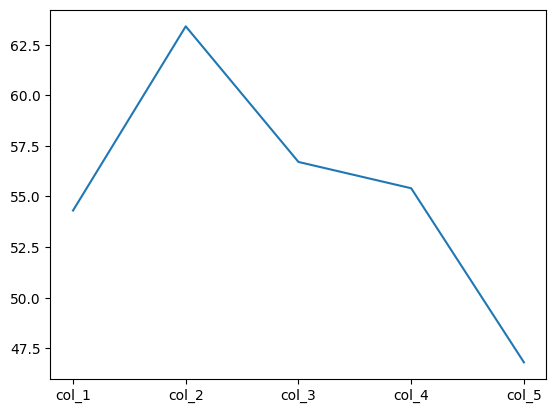

In [3]:
v0, v1, size = 10, 100, [10, 5]
matrix = np.random.randint(v0, v1+1, size=size)

diccionario = {}
for col in range(5):
    diccionario["col_"+str(col+1)] = np.mean(matrix[:, col])
lista = list(diccionario.values())

x = range(5)
plt.plot(x, lista)
plt.xticks(x, diccionario.keys());

print(matrix, "\n", diccionario)

🔹 Ejercicio Evolución temporal simulada

Simula con NumPy una lista de 30 días con valores aleatorios de temperatura entre 15°C y 35°C.

Almacena los valores en un diccionario con claves "día_1", "día_2", ....

Usa un bucle para crear una lista con los días donde la temperatura superó 30°C.

Grafica las temperaturas en un gráfico de línea con puntos marcados (scatter + line plot).

Marca en rojo los días con temperatura > 30°C.

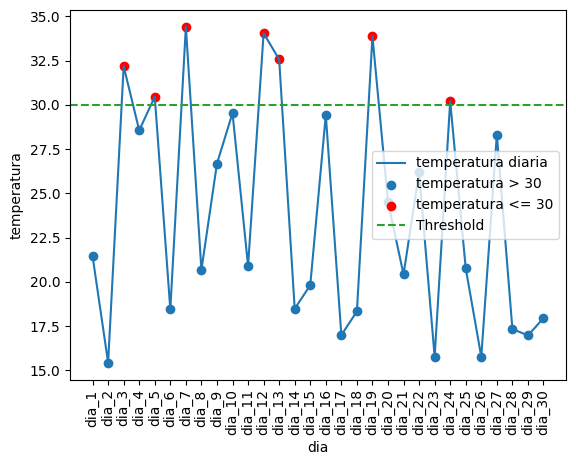

In [4]:
v0, v1, size = 15, 35, 30
matrix = np.random.uniform(v0, v1, size=size)

diccionario = dict(zip(['dia_'+str(i+1) for i in range(size)], matrix.round(2)))

threshold = 30
lista = []
for key, value in diccionario.items():
    if value > threshold:
        lista.append(key)
        
x = range(size)
plt.plot(x, diccionario.values(), linestyle='-', label='temperatura diaria');

dias_abajo_30 = [dia for dia in diccionario.keys() if dia not in lista]
plt.scatter([int(dia.split(sep='_')[-1])-1 for dia in dias_abajo_30], matrix[~(matrix>30)], 
            color='tab:blue', label=f'temperatura > {threshold}')
plt.scatter([int(dia.split(sep='_')[-1])-1 for dia in lista], matrix[matrix>30], 
            color='red', label=f'temperatura <= {threshold}')
plt.xticks(x, diccionario.keys(), rotation=90)
plt.axhline(threshold, color='tab:green', linestyle="--", label="Threshold")

plt.legend(loc='right')
plt.xlabel("dia")
plt.ylabel("temperatura")
plt.show()


🔹 Ejercicio Comparación de distribuciones

Genera dos arreglos de 100 números aleatorios con distribución normal:

grupo_A: media 50, desviación 10

grupo_B: media 60, desviación 15

Guarda en un diccionario con claves "A" y "B".

Calcula media y desviación estándar de cada grupo y guárdalas en listas.

Grafica ambos grupos en un histograma comparativo (superposición con colores diferentes y transparencia).

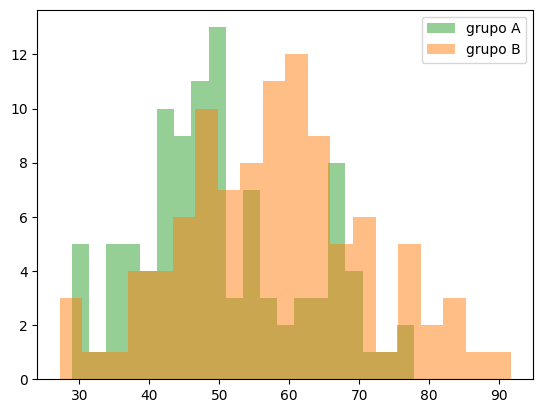

In [14]:
grupoA = np.random.normal(loc=50, scale=10, size=100)
grupoB = np.random.normal(loc=60, scale=15, size=100)

diccionario = {'A': grupoA, 'B': grupoB}
lista = [[grupoA.mean(), grupoA.std()], [grupoB.mean(), grupoB.std()]]

plt.hist(grupoA, bins=20, color='tab:green', alpha=0.5, label='grupo A')
plt.hist(grupoB, bins=20, color='tab:orange', alpha=0.5, label='grupo B')

plt.legend()

🔹 Ejercicio Clasificación de temperaturas

Genera una Serie con 50 valores aleatorios entre -10 y 40 (temperaturas).

Recorre la Serie y clasifica cada temperatura en un diccionario:

"frío" si < 10

"templado" si 10–25

"calor" si > 25

Convierte el diccionario en un DataFrame con columnas "Temperatura" y "Categoría".

Cuenta cuántos valores cayeron en cada categoría.

In [15]:
v0, v1, size = -10, 40, 50

serie = pd.Series(np.round(np.random.uniform(v0, v1, size=size), 2))

temperaturas = {'frio': serie[serie < 10], 
                'templado': serie[(10 <= serie) & (serie <= 25)], 
                'calor': serie[serie > 25]}

df = pd.DataFrame(columns=['Temperatura', 'Categoria'])
for key, values in temperaturas.items():
    for value in values:
        df.loc[len(df)] = [key, value]

for key in temperaturas.keys():
    print(f'Total de valores en {key} = {len(temperaturas[key])}')
df

Total de valores en frio = 17
Total de valores en templado = 20
Total de valores en calor = 13


,Temperatura,Categoria
0,frio,-2.23
1,frio,9.79
2,frio,4.84
3,frio,-6.49
4,frio,9.68
5,frio,-6.50
6,frio,-3.26
7,frio,-0.96
8,frio,1.79
9,frio,3.19


🔹 Ejercicio Matriz de distancias

Genera una matriz 10x2 con coordenadas aleatorias (x, y) entre 0 y 100.

Con un bucle, calcula las distancias euclidianas entre cada par de puntos y guárdalas en un diccionario con claves (i,j).

Convierte el diccionario en un DataFrame de 10x10 (matriz de distancias).

Encuentra el par de puntos más cercanos y el más lejano.

In [142]:
v0, v1, size = 0, 100, [10, 2]

coords = np.round(np.random.uniform(v0, v1, size=size), 2)

diccionario = {}
for idx1, punto1 in enumerate(coords):
    for idx2, punto2 in enumerate(coords):
        diccionario[(idx1, idx2)] = round(np.linalg.norm(punto1-punto2), 2)

df = pd.DataFrame(columns=range(size[0]), index=range(size[0]))
for idx1, punto1 in enumerate(coords):
    for idx2, punto2 in enumerate(coords):
        df.iloc[idx1, idx2] = diccionario[(idx1, idx2)]

df

,0,1,2,3,4,5,6,7,8,9
0,0.0,45.58,14.65,21.06,8.56,32.79,78.78,83.23,29.24,37.22
1,45.58,0.0,32.73,49.68,44.55,16.02,35.23,48.83,48.38,34.29
2,14.65,32.73,0.0,19.82,18.38,23.13,67.34,75.35,35.12,35.41
3,21.06,49.68,19.82,0.0,29.44,42.7,84.91,94.85,49.91,54.38
4,8.56,44.55,18.38,29.44,0.0,29.94,75.75,77.81,20.68,30.12
5,32.79,16.02,23.13,42.7,29.94,0.0,46.07,52.23,32.48,20.5
6,78.78,35.23,67.34,84.91,75.75,46.07,0.0,25.64,71.95,53.53
7,83.23,48.83,75.35,94.85,77.81,52.23,25.64,0.0,67.23,49.32
8,29.24,48.38,35.12,49.91,20.68,32.48,71.95,67.23,0.0,18.62
9,37.22,34.29,35.41,54.38,30.12,20.5,53.53,49.32,18.62,0.0


In [148]:
# Punto más cercanos
min_val = df[df > 0].min().min()
loc = np.where(df[df > 0] == min_val)

rows, cols = loc[0][0], loc[0][1]
print('Los puntos más cercanos son:', rows, cols)

# Punto más lejanos
min_val = df[df > 0].max().max()
loc = np.where(df[df > 0] == min_val)

rows, cols = loc[0][0], loc[0][1]
print('Los puntos más lejanos son:', rows, cols)

Los puntos más cercanos son: 0 4
Los puntos más lejanos son: 3 7


🔹 Ejercicio Análisis de series temporales

Genera con NumPy una Serie de 365 valores aleatorios entre 10 y 40 (temperatura diaria de un año).

Convierte en un DataFrame con columnas "Día" y "Temperatura".

Usa un bucle para calcular la media de cada mes (asume 30 días por mes).

Guarda las medias en un diccionario {Mes: Promedio}.

Convierte el diccionario en una Series y ordénala de mayor a menor.

In [172]:
v0, v1, size = 10, 40, 365

serie = pd.Series(np.round(np.random.uniform(v0, v1, size=size), 2))

df = pd.DataFrame({'dia': ['dia_'+str(i).zfill(3) for i in range(size)], 
                   'temperatura': serie})

temperatura_por_mes = {}
for mes in range(int(np.ceil(size/30))):
    temperatura_por_mes['mes'+str(mes+1).zfill(2)] = np.mean(serie[30*mes: min(30*(mes+1), size)]).round(2)
    
serie_por_mes = pd.Series(data=temperatura_por_mes.values(), index=temperatura_por_mes.keys())
serie_por_mes.sort_values(ascending=False)

mes13    31.36
mes04    26.52
mes01    26.49
mes02    26.16
mes12    25.75
mes09    25.64
mes03    25.25
mes06    25.19
mes07    24.83
mes05    24.76
mes10    24.40
mes11    24.04
mes08    24.01
dtype: float64

🔹 Ejercicio Actividad neuronal por regiones

Genera una matriz 100x5 con NumPy representando la actividad de 100 neuronas en 5 regiones cerebrales (valores entre 0 y 1 como tasas de disparo).

Convierte la matriz en un DataFrame con columnas "Región_1"... "Región_5".

Usa un bucle para calcular la actividad media de cada región y guárdala en un diccionario.

Convierte el diccionario en una Series y ordénala de mayor a menor.

In [20]:
v0, v1 = 0, 1

actividad = np.random.rand(100, 5)

df = pd.DataFrame({'Region_'+str(i+1): actividad[:, i] for i in range(5)})

diccionario = {}
for region in df.columns:
    diccionario[region] = df[region].mean()
    
serie_actividad = pd.Series(data=diccionario.values(), index=diccionario.keys())
serie_actividad.sort_values(ascending=False)

Region_5    0.537283
Region_1    0.531280
Region_3    0.528678
Region_2    0.511412
Region_4    0.490673
dtype: float64

🔹 Ejercicio Conectividad funcional (correlaciones)

Simula con NumPy una matriz 200x4 con series de tiempo de actividad fMRI en 4 áreas cerebrales.

Convierte en un DataFrame con columnas "Área_1"... "Área_4".

Con un bucle, calcula la correlación de Pearson entre todas las parejas de áreas y guárdala en un diccionario con claves (Área_i, Área_j).

Convierte el diccionario en un DataFrame cuadrado (matriz de conectividad).

In [178]:
actividad = np.random.rand(200, 4)

df = pd.DataFrame({'Area_'+str(i+1): actividad[:, i] for i in range(4)})

diccionario = {}
for area1 in df.columns:
    for area2 in df.columns:
        corr_matrix = np.corrcoef(df[area1], df[area2])
        diccionario[(area1, area2)] = corr_matrix[0, 1].round(2)
        
diccionario
df = pd.DataFrame(columns=df.columns, index=df.columns)
for area1 in df.columns:
    for area2 in df.columns:
        df.loc[area1, area2] = diccionario[(area1, area2)]

df

,Area_1,Area_2,Area_3,Area_4
Area_1,1.0,-0.06,0.06,-0.01
Area_2,-0.06,1.0,-0.22,-0.03
Area_3,0.06,-0.22,1.0,0.05
Area_4,-0.01,-0.03,0.05,1.0


🔹 Ejercicio Potenciales de acción por neurona

Genera una lista de 50 neuronas.

Para cada neurona, simula con NumPy una Serie de 100 ms de actividad (valores enteros 0 o 1 indicando si disparó o no).

Guarda los resultados en un diccionario {Neurona: Serie}.

Crea un DataFrame con todas las neuronas (filas) y tiempos (columnas).

Usa un bucle para contar cuántos disparos totales tuvo cada neurona y genera una Series con esos valores.

In [196]:
v0, v1, size = 0, 1, 50

neuronas = ['neurona_'+str(i+1).zfill(2) for i in range(size)]

diccionario = {neurona: np.random.randint(low=v0, high=v1+1, size=size) for neurona in neuronas}

df = pd.DataFrame(diccionario).transpose()

serie = {}
for neurona in df.index:
    serie[neurona] = df.loc[neurona].sum()
    
serie = pd.Series(data=serie.values(), index=serie.keys())
serie

neurona_01    21
neurona_02    21
neurona_03    28
neurona_04    29
neurona_05    29
neurona_06    22
neurona_07    19
neurona_08    28
neurona_09    27
neurona_10    25
neurona_11    26
neurona_12    22
neurona_13    22
neurona_14    34
neurona_15    22
neurona_16    26
neurona_17    28
neurona_18    30
neurona_19    19
neurona_20    27
neurona_21    29
neurona_22    26
neurona_23    28
neurona_24    22
neurona_25    22
neurona_26    24
neurona_27    29
neurona_28    19
neurona_29    28
neurona_30    20
neurona_31    21
neurona_32    26
neurona_33    34
neurona_34    26
neurona_35    26
neurona_36    26
neurona_37    24
neurona_38    26
neurona_39    29
neurona_40    27
neurona_41    26
neurona_42    25
neurona_43    23
neurona_44    28
neurona_45    17
neurona_46    29
neurona_47    20
neurona_48    25
neurona_49    26
neurona_50    28
dtype: int64

In [194]:
df.loc['neurona_01'].sum()

30

🔹 Ejercicio EEG por canales

Simula una matriz 500x8 con NumPy representando 500 muestras de señal EEG en 8 canales (valores flotantes entre -100 y 100 µV).

Convierte la matriz en un DataFrame con columnas "Canal_1"... "Canal_8".

Usa un bucle para calcular la potencia media de cada canal (media del cuadrado de la señal).

Guarda los resultados en un diccionario y conviértelo en una Series ordenada.

Identifica el canal con mayor potencia.

In [209]:
v0, v1, size = -100, 100, [500, 8]

matriz = np.random.uniform(v0, v1, size=size)

df = pd.DataFrame({'Canal_'+str(i+1): matriz[:, i] for i in range(size[-1])})

diccionario = {}
for canal in df.columns:
    diccionario[canal] = df[canal].mean().round(2)
    
serie = pd.Series(data=diccionario.values(), index=diccionario.keys())
serie.sort_values(ascending=True)

print('La serie es:\n', serie)
print('El canal con mayor potencia es ', serie[serie == serie.max()].index)

La serie es:
 Canal_1    0.68
Canal_2    1.76
Canal_3   -0.96
Canal_4   -0.17
Canal_5    2.67
Canal_6    3.54
Canal_7    3.77
Canal_8    1.08
dtype: float64
El canal con mayor potencia es  Index(['Canal_7'], dtype='object')


🔹 Ejercicio Análisis de respuestas a estímulos

Genera un DataFrame con 30 sujetos (filas) y 3 condiciones experimentales ("Cond_A", "Cond_B", "Cond_C") con valores de tiempo de reacción simulados (valores entre 200–800 ms).

Usa un bucle para calcular el promedio por condición en toda la muestra.

Convierte los resultados en un diccionario y luego en una Series.

Agrega una columna "Mejor_condición" al DataFrame indicando la condición más rápida por sujeto.

Cuenta cuántos sujetos respondieron mejor en cada condición.

In [228]:
v0, v1, size = 200, 800, [30, 3]

matriz = np.random.randint(v0, v1, size=size)
condiciones = ["Cond_A", "Cond_B", "Cond_C"]

df = pd.DataFrame(matriz, columns=condiciones)

diccionario = {}
for cond in df.columns:
    diccionario[cond] = df[cond].mean().round(2)
    
serie = pd.Series(data=diccionario.values(), index=diccionario.keys())

mejor_condicion = []
for raw in range(len(df)):
    mejor_condicion.append(df.columns[(df == df.loc[raw].min()).any()][0])
df['mejor_condicion'] = mejor_condicion  # df.idxmin(axis=1)

In [229]:
df

,Cond_A,Cond_B,Cond_C,mejor_condicion
0,545,620,562,Cond_A
1,260,353,394,Cond_A
2,674,786,233,Cond_C
3,302,397,709,Cond_A
4,739,647,424,Cond_C
5,263,685,683,Cond_A
6,699,465,278,Cond_C
7,651,358,681,Cond_A
8,535,635,264,Cond_C
9,693,798,200,Cond_C
